# Part 1
## Modeling

### 1.1 Python Coding and Data Set

**QUESTION:** Load in the data file and header file provided

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# The dataframe does not currently have a header, load in the header file and attach it to the dataframe
cancer_df_ori = pd.read_csv("breast-cancer.csv", header=None)
cancer_header_ori = open("field_names.txt", 'r').read().split('\n')

# Copy original dataframe to a new dataframe and rename columns
cancer_df = cancer_df_ori.copy()
cancer_df.columns = cancer_header_ori

In [2]:
cancer_df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**QUESTION:** Comment on any steps you might take to evaluate or transform the dataset.

After loading the data, I usually perform the following steps:
1. <b>Check on the structure of the data</b> - make sure all columns are of the expected data type. If not, transform features to appropriate data types
2. <b>Check on target variable distribution</b> - if there is an imbalance of positive vs negative cases, consider using upsampling techniques such as SMOTE (Synthetic Minority Oversampling Technique) so that there is enough positive cases for the classification model to learn from  
3. <b>Check for missing values</b> - if there are missing values, design a process to deal with missing values such as imputing with the mean/median or removing observations with missing values altogether
4. <b>Check for outliers</b> - if there are outliers, design a process to deal with outliers such as min/max capping, discretizing the feature, or removing the outlier observations altogether
5. <b>Remove non-imformative variables</b> - columns such as id, name, etc. should be removed 
6. <b>Check for zero-variance features</b> - consider removing zero-variance feature as they don't contain any information
7. <b>Check for correlation between features</b> - for highly correlated features, only one of the correlated features needs to be maintained as correlated features contain redundant information

In [3]:
# Check on structure of data
cancer_df.info()

# Except for the diagnosis feature, all other data types appear to be correct. Convert diagnosis = "M" to 1, else 0 
cancer_df["diagnosis"] = cancer_df.diagnosis.apply(lambda x: 1 if x == "M" else 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In [4]:
# Check on target variable distribution
cancer_df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

The number of positive and negative observations is quite similar so no upsampling is required

In [5]:
# Check for missing values
cancer_df.isnull().values.any()

False

No null values were found so imputation is not required

**QUESTION:** Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [6]:
# Calculate mean and median using aggregate function
cancer_df_summary = cancer_df.groupby("diagnosis")["smoothness_mean","compactness_mean"].aggregate({
    "mean":"mean",
    "median":"median"
})
print(cancer_df_summary)

                     mean                           median                 
          smoothness_mean compactness_mean smoothness_mean compactness_mean
diagnosis                                                                  
0                2.000321         0.021438          1.8510          0.01631
1                4.323929         0.032281          3.6795          0.02859


C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [7]:
# Perform t-test on means
cancer_df_malignant = cancer_df[cancer_df["diagnosis"] == 1]
cancer_df_benign = cancer_df[cancer_df["diagnosis"] == 0]

smoothness_t_test = stats.ttest_ind(cancer_df_malignant.smoothness_mean, cancer_df_benign.smoothness_mean)
compactness_t_test = stats.ttest_ind(cancer_df_malignant.compactness_mean, cancer_df_benign.compactness_mean)

print("Smoothness T-test p-value: " + str(smoothness_t_test.pvalue))
print("Compactness T-test p-value: " + str(compactness_t_test.pvalue))

Smoothness T-test p-value: 1.6519051758498057e-47
Compactness T-test p-value: 9.975994654074587e-13


There appears to be a difference in the mean and median for both smoothness and compactness of benign vs malignant tumors where malignant tumors have on average higher smoothness and compactness values. However, to be sure that the difference in values is statistically significant, I performed a t-test. The t-test results confirmed that the smoothness and compactness of malignant vs benign tumors are indeed statistically different as the p-values were much less than 0.05. This indicates that smoothness and compactness may be good indicators to differentiate between malignant and benign tumors. 

***QUESTION:*** Write a function to generate bootstrap samples of the data

In [8]:
# The function below creates a bootstrap sample from the user provided dataframe. 
# The user will need to input the desired number of samples.
# The function allows sampling of the same observation more than once
def bootstrap(data, n):
    sample = data.sample(n, replace=True) 
    return sample

In [9]:
bootstrap(cancer_df, 5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
340,89813,0,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.04223,...,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764
350,899187,0,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
38,855133,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.02899,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
123,865432,0,14.50,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.05778,...,15.70,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006
252,885429,1,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.09740,...,25.28,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970


### 1.2 Exploratory Analysis

As part of the exploratory analysis process, I will usually: 

1. Check for outliers
2. Get a sense of which independent features have the highest predictive power with regards to the target variable

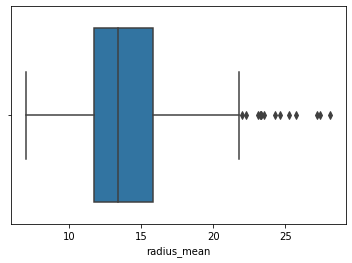

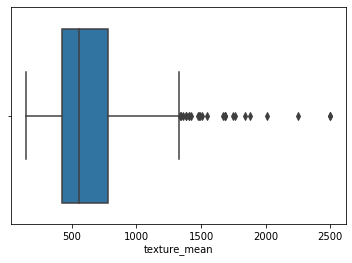

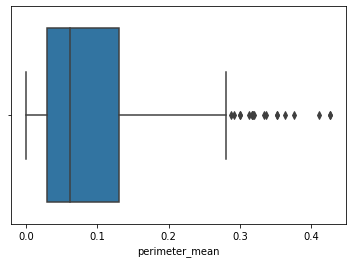

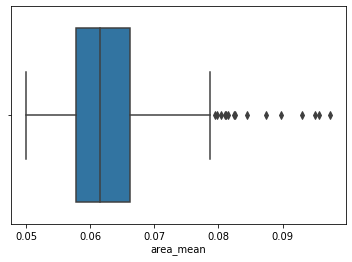

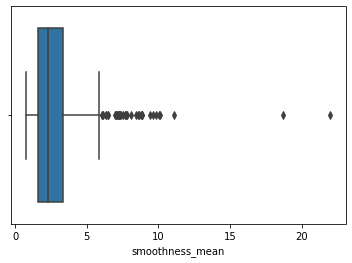

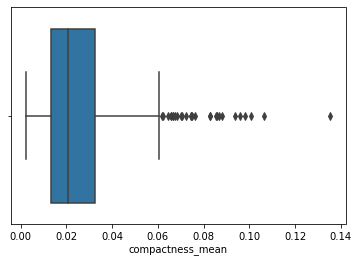

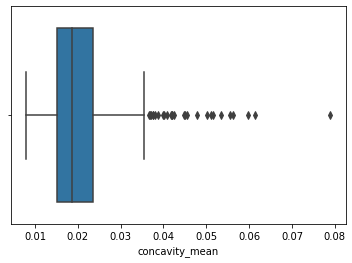

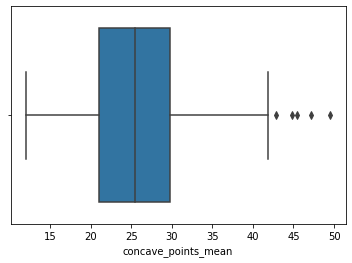

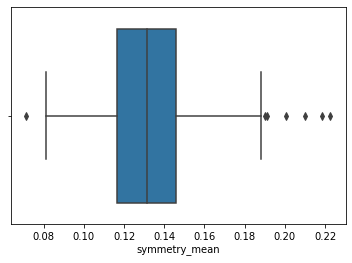

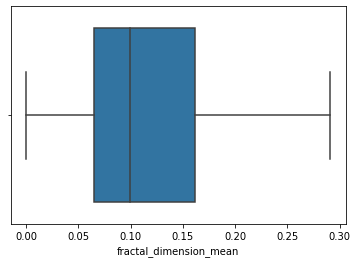

In [10]:
# Select only columns with mean in the column name as the other columns are statistics of the same metric
eda_columns = [col for col in cancer_df.columns if '_mean' in col]

# Create boxplots
for column in eda_columns:
    sns.boxplot(cancer_df[column])
    plt.show()

The boxplots above show there are a few outliers in each feature (expect for fractal_dimension_mean). However, as this is a first draft of a classification model, I will see if we can achieve good accuracy without applying any outlier removal techniques.

**QUESTION:** Identify 2-3 variables that are predictive of a malignant tumor. Display the relationship visually and write 1-2 sentences explaining the relationship.

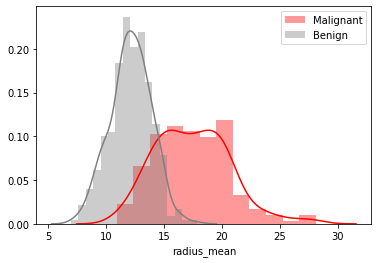

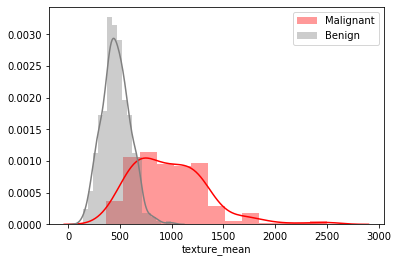

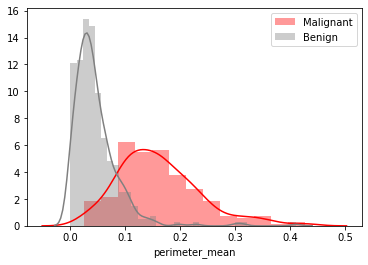

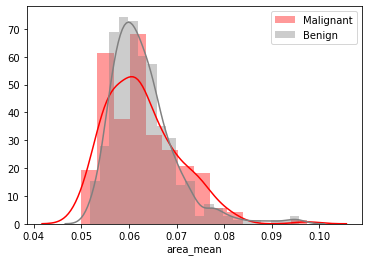

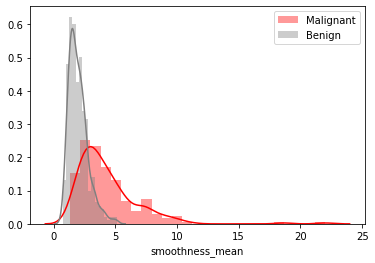

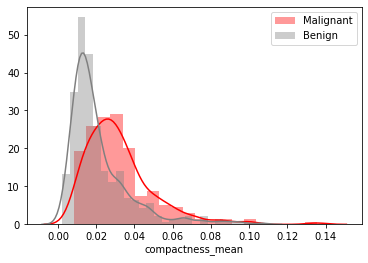

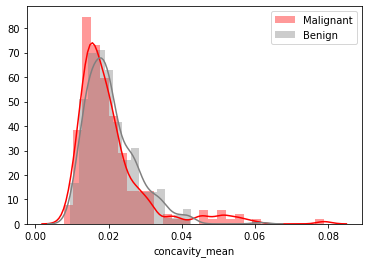

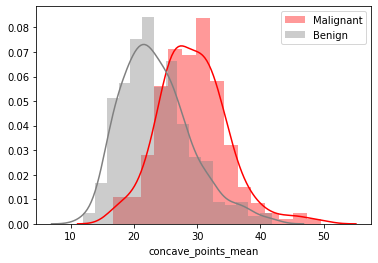

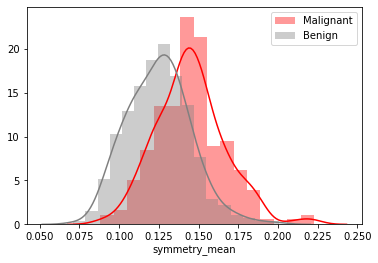

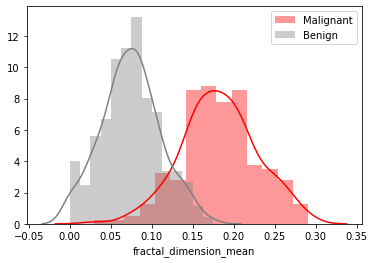

In [11]:
# Create separate dataframes for malignant and benign observations
cancer_df_malignant = cancer_df[cancer_df["diagnosis"] == 1]
cancer_df_benign = cancer_df[cancer_df["diagnosis"] == 0]

# Select only columns with mean in the column name as the other columns are statistics of the same metric
eda_columns = [col for col in cancer_df.columns if '_mean' in col]

# Plot distribution plots
for column in eda_columns:
    sns.distplot(cancer_df_malignant[column], color="red", label="Malignant")
    sns.distplot(cancer_df_benign[column], color="grey", label="Benign")
    plt.legend()
    plt.show()

If the malignant and benign ditribution plots are well separated, it indicates that the feature is a good candidate to differentiate between malignant and benign tumors. 

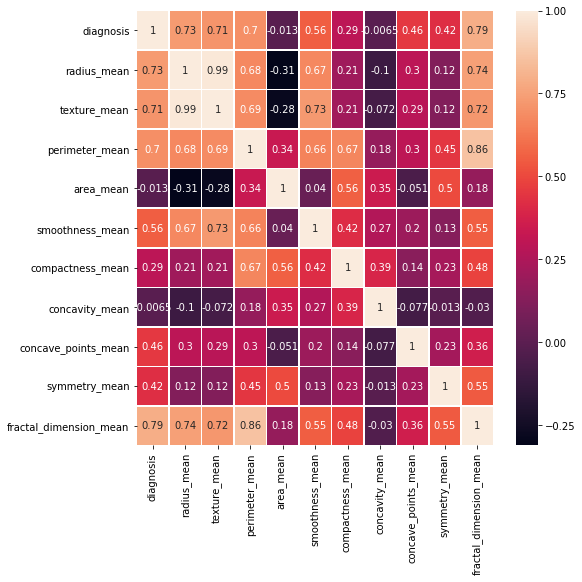

In [12]:
# Select only columns to be used in correlation mapping
correlation_columns = [col for col in cancer_df.columns if ('_mean' in col) | (col == "diagnosis")]

# Create correlation matrix
corr_mat = cancer_df[correlation_columns].corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, linewidths=.5, ax=ax)
plt.show()

Based on the distribution plots and the heat map above (correlation coefficient > 0.7 indicates high correlation), the following features seem to be good predictors of a malignant tumor:
1. radius_mean
2. texture_mean
3. perimeter_mean
4. fractal_dimension_mean

### 1.3 Modeling

Before creating a model from the dataframe, the first thing is to reduce the number of features which will help with the training time as well as interpretability. A few methods to reduce the number of features are listed below:
- Remove non-informative variables
- Check for zero-variance features
- Remove highly correlated features

In [13]:
cancer_df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Remove non-informative features
X = cancer_df.drop(["ID", "diagnosis"], axis = 1)
y = cancer_df["diagnosis"]

# Keep only features with _mean in the name as the rest as statistics of the same metric
for column in X.columns:
    if '_mean' not in column:
        X = X.drop(column, axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10)
memory usage: 44.6 KB


The ID column was removed as it is non-informative and only the mean statistic column for each metric was retained 

In [15]:
# Check if there are any features with zero variance and remove if applicable
print("Variance")
print(X.var())

to_drop = X.var()[X.var() == 0.0].index
print()
print("Columns to drop (due to zero variance)")
print(to_drop)
X = X.drop(to_drop, axis = 1)

Variance
radius_mean                   12.418920
texture_mean              123843.554318
perimeter_mean                 0.006355
area_mean                      0.000050
smoothness_mean                4.087896
compactness_mean               0.000321
concavity_mean                 0.000068
concave_points_mean           37.776483
symmetry_mean                  0.000521
fractal_dimension_mean         0.004321
dtype: float64

Columns to drop (due to zero variance)
Index([], dtype='object')


There are no zero-variance features so no features were removed due to lack of information

In [16]:
# Remove highly correlated features
corr_matrix = X.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print("Columns to drop (due to high correlation)")
print(to_drop)

X = X.drop(to_drop, axis=1)

Columns to drop (due to high correlation)
['radius_mean']


One feature, radius_mean, was removed because it is highly correlated with texture_mean

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train.head()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
311,664.9,0.01447,0.05255,1.954,0.006021,0.01494,21.75,0.1011,0.05813
502,476.3,0.05928,0.06612,1.566,0.015670,0.02801,21.40,0.1580,0.08411
28,732.4,0.16830,0.06540,3.498,0.030570,0.01768,36.71,0.1641,0.20240
313,409.1,0.01367,0.06100,1.107,0.013400,0.02032,12.87,0.1092,0.04715
345,321.6,0.03581,0.07005,2.394,0.046710,0.03675,19.48,0.1360,0.04074


For certain classification algorithms, feature scaling is required. As I will be using Logistic Regression, feature scaling is required.

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Change to data frame
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [20]:
#### LOGISTIC REGRESSION ####
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.feature_selection import RFE

# Train model
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)

# Predict on X_test dataset
y_pred = logreg.predict(X_test_sc)

# Print performance evaluation metrics
print("Performance Metrics (Logistic Regression)")
print(classification_report(y_test, y_pred))
print("AUC Score : %.4f" % roc_auc_score(y_test, y_pred))
 
# Ranking features
sel = RFE(logreg, 1)
sel = sel.fit(X_train_sc, y_train)
order = sel.ranking_

data = {'feature': X_train_sc.columns, 'order': order}
feature_ranking = pd.DataFrame(data)
print()
print("Feature Importance (Logistic Regression)")
print(feature_ranking.sort_values(by = "order"))


Performance Metrics (Logistic Regression)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

AUC Score : 0.9623

Feature Importance (Logistic Regression)
                  feature  order
8  fractal_dimension_mean      1
0            texture_mean      2
6     concave_points_mean      3
3         smoothness_mean      4
7           symmetry_mean      5
1          perimeter_mean      6
2               area_mean      7
4        compactness_mean      8
5          concavity_mean      9


C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [21]:
#### RANDOM FOREST ####
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on X_test dataset
y_pred = rf.predict(X_test)

# Print performance evaluation metrics
print("Performance Metrics (Random Forest)")
print(classification_report(y_test, y_pred))
print("AUC Score : %.4f" % roc_auc_score(y_test, y_pred))
 
# Ranking features
feature_ranking = pd.Series(rf.feature_importances_, index=X_train.columns)

print()
print("Feature Importance (Random Forest)")
print(feature_ranking.sort_values(ascending = False))


Performance Metrics (Random Forest)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC Score : 0.9435

Feature Importance (Random Forest)
fractal_dimension_mean    0.479864
perimeter_mean            0.171437
texture_mean              0.157041
concave_points_mean       0.058698
smoothness_mean           0.053232
symmetry_mean             0.031279
area_mean                 0.018987
concavity_mean            0.018198
compactness_mean          0.011263
dtype: float64


C:\Users\A2413\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**QUESTION:** Build a model to predict the malignant tumors.
- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model.
- In each model, identify the most important predictive variables and explain how you identified them.


| Model | Pros | Cons |
|:--- |:--- |:--- |
| Logistic Regression | Easy to implement <br> Quick to train, which makes it a good benchmark | Requires to scale features <br> Assumes linearity |
| Random Forest | Easy to implement <br> Least amount of preprocessing required <br> Robust to outliers <br> Most similar to business rules - intepretable | Prone to overfitting |

To control overfitting, you can:
1. Perform cross validation
2. Reduce the number of features
3. Use more training data
4. For logistic regression, you can introduce regularization through modifying the C parameter
5. For random forest, you can reduce the complexity of the model by reducing the number of trees

In this case, the logistic regression performed slightly better than the random forest model with an AUC of 0.9623 versus the random forest model which achieved an AUC score of 0.9435. Regardless, both these AUC scores are very strong and are hardly ever achieved with actual real-world data. Both models identified fractal_dimention_mean and tecture_mean as important variables. This conclusion is supported by the heatmap that was created during the EDA process. To obtain the feature importance for the logistic regression model, I used the RFE (recursive feature elimination) function and for random forest, I used the feature_importances_ attribute of the random forest model.

RFE works by searching for a subset of features by starting with all features in the training dataset and then removing features until the desired number of features remain, eliminating the least important feature at each iteration. For random forest, the most important features are features that best split the observations into malignant and benign tumors. 

### 1.4 Explanation

**QUESTION:** To Technical Audiences 
- Explain the limitations of your analysis and identify possible further steps you could take.

Listed below are a few limitations of the analysis above:
1. I have not removed any outliers. Model performance can probably be improved slightly by removing outliers
2. Currently for both models, I have used only the default parameters. To improve the performance of the model, it is recommended to perform hyperparameter tuning, trying different combinations of parameters and checking if the model's AUC score improves
3. Only two types of classification algorithms were used. It is highly recommended to try other algorithms such as XGBoost, KNN, or SVC (Support Vector Classification)

**QUESTION:** To Non-Technical Audiences
- Write a short summary of your analysis, explaining how your model works and how it performs.
- Briefly explain the factors that contributed to malignant vs benign tumor identification.

Currently the model created can accept the following tumor measurements and diagnose with 96% accuracy if a tumor is malignant or benign:
1. fractal_dimension_mean    
2. perimeter_mean            
3. texture_mean              
4. concave_points_mean       
5. smoothness_mean           
6. symmetry_mean             
7. area_mean                 
8. concavity_mean            
9. compactness_mean

In particular, the model relies heavily on the fractal_dimension_mean and texture_mean to determine if a tumor is malignant or benign. Currently, we have created and tested the model on a small set of data (i.e. 569 samples). In order to be more confident of the model's accuracy, we should test its performance on a larger sample size of data.  

# Part 2
## Feedback

STUDENT #1
1. **Code**
    - Line #5: LinearRegression needs to be imported from sklearn.linear_model
    - Line #6: cross_val_score needs to be imported from sklearn.model_selection instead of sklearn.cross_validation 
    - Line #9: Should change variable name from d to data 
    - Line #20 and #21: import code should be at the top for cleanliness and it helps with easy identification of redundant import calls (e.g. from sklearn.cross_validation import cross_val_score)
    - Line #21: train_test_split needs to be imported from sklearn.model_selection instead of sklearn.cross_validation 
    - Line #22: cv=1 defeats the purpose of cross validation as this means there is only 1-fold which is the equivalent of not performing cross validation. cv should be > 1
    - Line #22: 'mean_absolute_error' is not a valid scoring value. Change it to 'neg_mean_absolute_error'
    
    
2. **Methodology**
    - Line #13 and #14: Rename x1 to y and x2 to X to indicate target and independent variables, respectively. This helps with readability in the future and for other team members
    - Line #14: when one-hot encoding categorical variables, it is good practice to limit the number of levels to n - 1 to minimize collinearity. Set drop_first = True in pd.get_dummies()
    - It is recommended to perform exploratory data analysis on the data. There may be a need to address missing values before building a model based on the dataset
    
    
3. **Conceptual Understanding**
    - Only using ContractType to predict salary may not be sufficient. ContractTime will most likely play a factor in determining a person's salary 
    - You can consider other performance metrics such as 'r2' and 'neg_mean_squared_error' when evaluating regression models. MAE (mean absolute error) does not penalize the model when the model's predictions are way off 
    - There is a lot of text in the dataset, using NLP to preprocess the Title and FullDescription columns into structured data may help to improve the predictive power of the model

STUDENT #2
1. **Code**
    - Line #6: cross_val_score needs to be imported from sklearn.model_selection instead of sklearn.cross_validation 
    - Line #20: 'mean_absolute_error' is not a valid scoring value. Change to 'neg_mean_absolute_error'
    
    
2. **Methodology**
    - Line #14: when one-hot encoding categorical variables, it is good practice to limit the number of levels to n - 1 to minimize collinearity. Set drop_first = True in pd.get_dummies()
    - It is recommended to perform exploratory data analysis on the data. There may be a need to address missing values before building a model based on the dataset
    
    
3. **Conceptual Understanding**
    - Only using ContractType to predict salary may not be sufficient. ContractTime will most likely play a factor in determining a person's salary 
    - You can consider other performance metrics such as 'r2' and 'neg_mean_squared_error' when evaluating regression models. MAE (mean absolute error) does not penalize the model when the model's predictions are way off 
    - There is a lot of text in the dataset, using NLP to preprocess the Title and FullDescription columns into structured data may help to improve the predictive power of the model